Exploratory Data Analysis (EDA) is the process of visualizing and analyzing data to extract insights from it. In other words, EDA is the process of summarizing important characteristics of data in order to gain better understanding of the dataset.

In this article, we are going to introduce you to the process of EDA through the analysis of the automobile dataset available here. We will talk about some common methods used for EDA and will let you know how to apply them for extracting meaningful insights from raw data.

[link](https://medium.com/code-heroku/introduction-to-exploratory-data-analysis-eda-c0257f888676)

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu(last_level=3)

## Descriptive statistics

Descriptive statistics analysis helps to describe the basic features of dataset and obtain a brief summary of the data.

The `describe()` method in `Pandas` library helps us to have a brief summary of the dataset. It automatically calculates basic statistics for all numerical variables excluding `NaN` (we will come to this part later) values.

Let’s import all the libraries and read the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
pd.options.display.max_columns = 99
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('automobile.csv')

In [4]:
df.head(3)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
symboling            201 non-null int64
normalized-losses    201 non-null int64
make                 201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               197 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-null float64
peak-rpm             201 non-n

In [6]:
ob_cols = ['make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
          'fuel-system', 'horsepower-binned']

In [7]:
for col in ob_cols:
    print('='*50)
    print(df[col].value_counts())

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64
std      165
turbo     36
Name: aspiration, dtype: int64
four    115
two      86
Name: num-of-doors, dtype: int64
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64
fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64
front    198
rear       3
Name: engine-location, dtype: int64
ohc      145
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
Name: engine-type, dtype: int64
four      157
six        24
five       10
eight       4
two   

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,201.0,0.840796,1.254802,-2.000000,0.000000,1.000000,2.000000,3.000000
normalized-losses,201.0,122.000000,31.996250,65.000000,101.000000,122.000000,137.000000,256.000000
wheel-base,201.0,98.797015,6.066366,86.600000,94.500000,97.000000,102.400000,120.900000
length,201.0,0.837102,0.059213,0.678039,0.801538,0.832292,0.881788,1.000000
width,201.0,0.915126,0.029187,0.837500,0.890278,0.909722,0.925000,1.000000
height,201.0,53.766667,2.447822,47.800000,52.000000,54.100000,55.500000,59.800000
curb-weight,201.0,2555.666667,517.296727,1488.000000,2169.000000,2414.000000,2926.000000,4066.000000
engine-size,201.0,126.875622,41.546834,61.000000,98.000000,120.000000,141.000000,326.000000
bore,201.0,3.330692,0.268072,2.540000,3.150000,3.310000,3.580000,3.940000
stroke,197.0,3.256904,0.319256,2.070000,3.110000,3.290000,3.410000,4.170000


It helps us to have a brief overview of the data. For example, by seeing the mean of `diesel` and `gas` column, we can say that 90% of the engines run on gas while almost 10% engines run on diesel.

### Box plots
Another way of analyzing numerical data would be to use box plots. Box plot shows us the median of the data, which represents where the middle data point is. The upper and lower quartiles represent the 75 and 25 percentile of the data respectively. The upper and lower extremes shows us the extreme ends of the distribution of our data. Finally, it also represents outliers, which occur outside the upper and lower extremes.

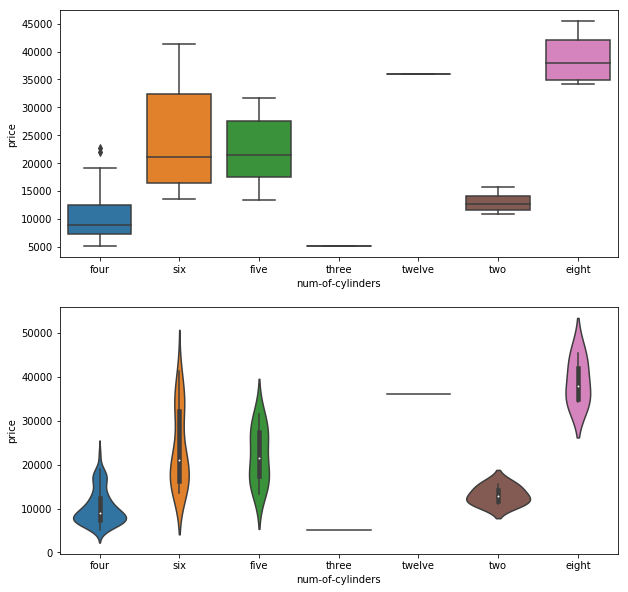

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.boxplot(x='num-of-cylinders', y='price', data=df)
plt.subplot(2,1,2)
sns.violinplot(x='num-of-cylinders', y='price', data=df)
plt.show()

We can see that the price of eight-cylinder cars lies between 35,000 to 45,000, while the price of four-cylinder cars lies between 5,000 to 19,000. It also tells us that the average price of five-cylinder cars and six-cylinder cars is almost same.

### Scatter plots
Often, we see some continuous variables in our data within a specific range. For example, in our dataset, engine size and price are continuous variables. What if we want to understand the relationship between these continuous variables? Could engine size possibly predict the price of the car?

A great way to visualize this relationship would be to use a scatter plot. Scatter plots represent each relationship between two continuous variables as individual data point in a 2D graph.

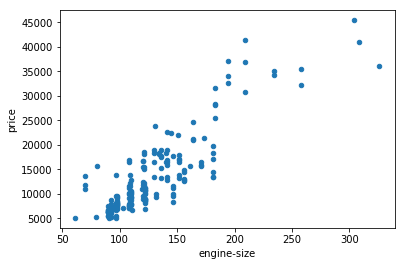

In [10]:
df.plot.scatter(x='engine-size', y='price')
plt.show()

### Histograms
Histogram shows us the frequency distribution of a variable. It partitions the spread of numeric data into parts called as “bins” and then counts the number of data points that fall into each bin. So, the vertical axis actually represents the number of data points in each bin.

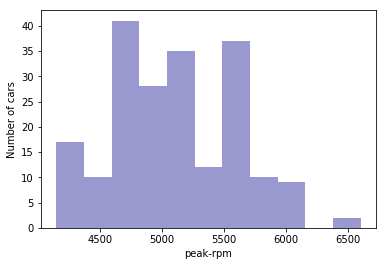

In [11]:
sns.distplot(df['peak-rpm'], color='darkblue', kde=False)
plt.ylabel('Number of cars')
plt.show()

The above output tells us that there are 10 cars which have peak rpm between 4395 and 4640, around 42 cars have peak rpm between 4640 and 4885 and so on.

## Grouping of data
Assume that you want to know the average price of different types of vehicles and observe how they differ according to body styles and number of doors. A nice way to do this would be to group the data according to “body-style” and “num-of-doors” and then see the average price across each category. The `groupby()` method from Pandas library helps us to accomplish this task.

In [12]:
df[['body-style', 'num-of-doors', 'price']].groupby(['body-style', 'num-of-doors']).mean()

price
body-style  num-of-doors              
convertible two           21890.500000
hardtop     two           22208.500000
hatchback   four           8372.000000
            two           10230.793103
sedan       four          14490.687500
            two           14283.000000
wagon       four          12371.960000

The above output tells us that two door hardtop and two door convertibles are the most expensive cars, whereas, four door hatchbacks are the cheapest.

A table of this form is not very easy to read. So, we can convert this table to a pivot table using the `pivot()` method, which would allow us to read this table in a better fashion.

In [13]:
round(df[['body-style', 'num-of-doors', 'price']]
  .groupby(['body-style', 'num-of-doors'])
  .mean()
  .reset_index()
  .pivot(index='body-style', columns='num-of-doors')
  .fillna(0),
      2)

price          
num-of-doors      four       two
body-style                      
convertible       0.00  21890.50
hardtop           0.00  22208.50
hatchback      8372.00  10230.79
sedan         14490.69  14283.00
wagon         12371.96      0.00

## Handling missing values
When no data value is stored for a feature in a particular observation, we say this feature has missing values. Examining this is important because when some of your data is missing, it can lead to weak or biased analysis.

We can detect missing values by applying `isnull()` method over the dataframe. The `isnull()` method returns a rectangular grid of boolean values which tells us if a particular cell in the dataframe has missing value or not.

In [14]:
pd.DataFrame(df.isnull().sum()).transpose()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0


In [15]:
df.stroke.fillna(df.stroke.median(), inplace=True)
df['horsepower-binned'].fillna(df['horsepower-binned'].mode()[0], inplace=True)

We can handle missing values in many ways:

- **Delete**: You can delete the rows with the missing values or delete the whole column which has missing values. The `dropna()` method from Pandas library can be used to accomplish this task.
- **Impute**: Deleting data might cause huge amount of information loss. So, replacing data might be a better option than deleting. One standard replacement technique is to replace missing values with the average value of the entire column. For example, we can replace the missing values in “stroke” column with the mean value of stroke column. The `fillna()` method from Pandas library can be used to accomplish this task.
- **Predictive filling**: Alternatively, you can choose to fill missing values through predictive filling. The `interpolate()` method will perform a linear interpolation in order to “guess” the missing values and fill the results in the dataset.

## ANOVA (Analysis of Variance)
ANOVA is a statistical method which is used for **figuring out the relation between different groups of categorical data**. The ANOVA test, gives us two measures as result:

- **F-test score**: It calculates the variation between sample group means divided by variation within sample group.
- **P value**: It shows us the confidence degree. In other words, it tells us whether the obtained result is statistically significant or not.

Let’s take an example to understand this better.

The following bar chart shows the average price of different car makes.

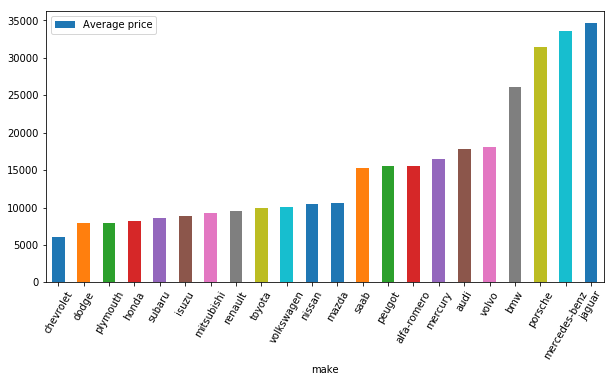

In [16]:
df[['make', 'price']].groupby('make').mean().reset_index().sort_values(by='price')\
  .rename(columns={'price': 'Average price'})\
  .plot(x='make', y='Average price', kind='bar', figsize=(10,5), rot=60)
plt.show()

We can see that the average price of “audi” and “volvo” is almost same. But, the average price of “jaguar” and “honda” differ significantly.

So, we can say that there is very small variance between “audi” and “volvo” because their average price is almost same. While the variance between “jaguar” and “honda” is significantly high. Let’s verify this using the ANOVA method.

In [17]:
temp_df = df[['make','price']].groupby(['make'])
stats.f_oneway(temp_df.get_group('audi')['price'],temp_df.get_group('volvo')['price'])

F_onewayResult(statistic=0.014303241552631388, pvalue=0.9063901597143602)

The result confirms what we guessed at first. Since the variance between the price of “audi” and “volvo” is very small, we got a F-test score which is very small (around 0.01) and a p value around 0.9.

Let’s do this test once more between “jaguar” and “honda” and see the results.

In [18]:
temp_df = df[['make','price']].groupby(['make'])
stats.f_oneway(temp_df.get_group('honda')['price'],temp_df.get_group('jaguar')['price'])

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

Notice that in this case, we got a very high F-Test score(around 401) with a p value around $1.05 \times 10^{-11}$ because, the variance between the average price of “jaguar” and “honda” is huge.

## Correlation
In other words, when we look at two variables over time, if one variable changes, how does this effect change in the other variable?

For example, smoking is known to be correlated with lung cancer. Since, smoking increases the chances of lung cancer.

Another example would be the relationship between the number of hours a student studies and the score obtained by that student. Because, we expect the student who studies more to obtain higher marks in the exam.

### Heatmap
Heatmap takes a rectangular data grid as input and then assigns a color intensity to each data cell based on the data value of the cell. This is a great way to get visual clues about the data.

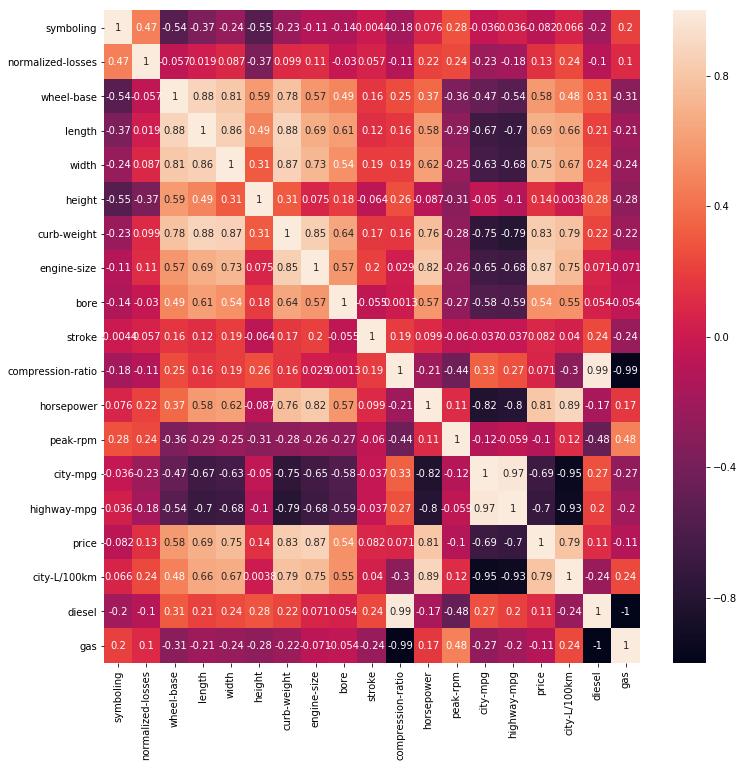

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

From the above heatmap, we can see that engine size and price are positively correlated(score of 0.87) with each other while, highway-mpg and price are negatively correlated(score of -0.7) with each other. In other words, it tells us that cars with larger engine sizes will be costlier than cars with small engine sizes. It also tells us that expensive cars generally have less MPG as compared to cheaper cars.

Let’s verify this relationship by plotting regression plots between these variables.

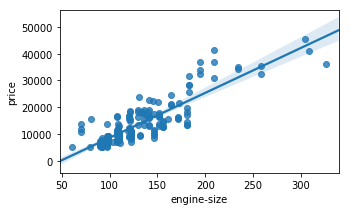

In [20]:
plt.figure(figsize=(5,3))
sns.regplot(x='engine-size',y='price',data=df)
plt.show()

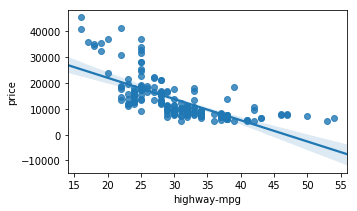

In [21]:
plt.figure(figsize=(5,3))
sns.regplot(x='highway-mpg',y='price',data=df)
plt.show()

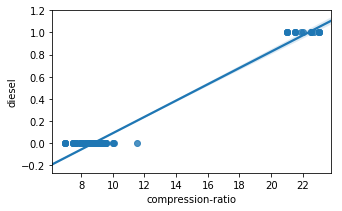

In [22]:
plt.figure(figsize=(5,3))
sns.regplot(x='compression-ratio',y='diesel',data=df)
plt.show()
